<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [5]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.drop(columns=['Unnamed: 0'], inplace =True)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations

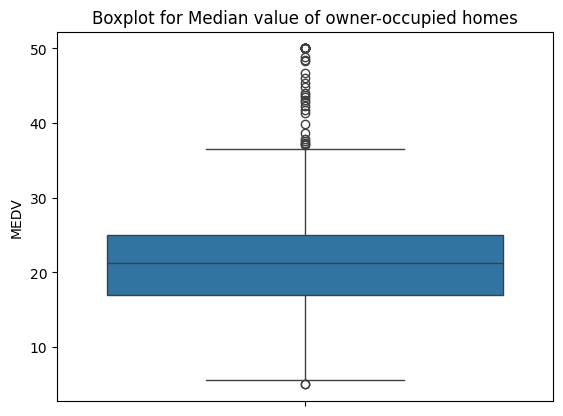

In [8]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y= boston_df['MEDV'])
plt.title('Boxplot for Median value of owner-occupied homes')
plt.show()

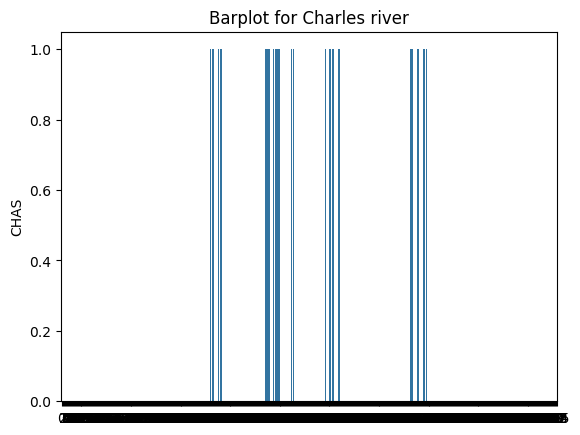

In [9]:
# Provide a  bar plot for the Charles river variable
sns.barplot(boston_df['CHAS'])
plt.title('Barplot for Charles river')
plt.show()


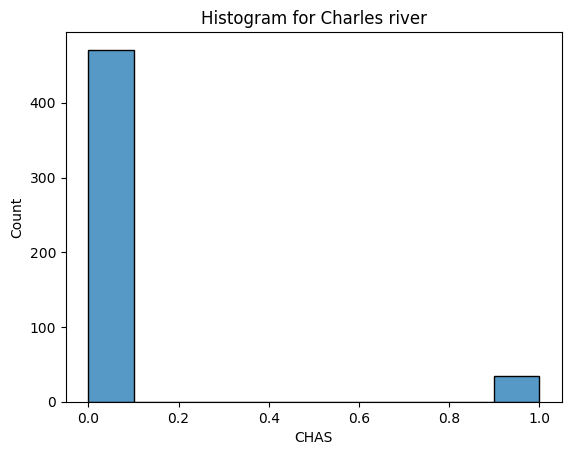

In [10]:
sns.histplot(boston_df['CHAS'])
plt.title('Histogram for Charles river')
plt.show()

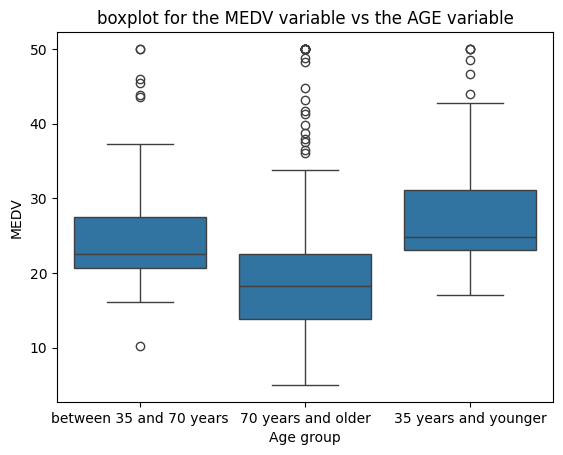

In [11]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
def create_age_group(age):
    if age <= 35:
        return '35 years and younger'
    elif age >= 70:
        return '70 years and older'
    return 'between 35 and 70 years'
boston_df['Age group'] = boston_df['AGE'].apply(create_age_group)
sns.boxplot(x=boston_df['Age group'], y= boston_df['MEDV'])
plt.title('boxplot for the MEDV variable vs the AGE variable')
plt.show()

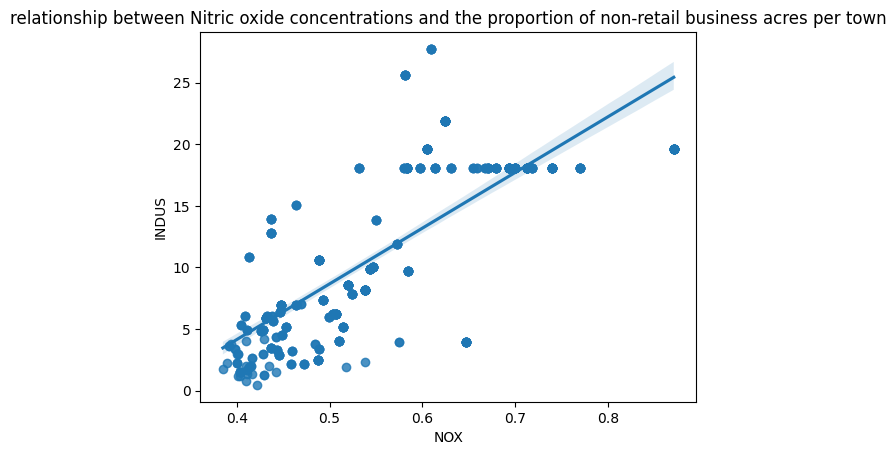

In [12]:
# Provide a scatter plot to show the relationship between 
# Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.regplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

In [13]:
# seems to have a linear positive relationship between the two variables

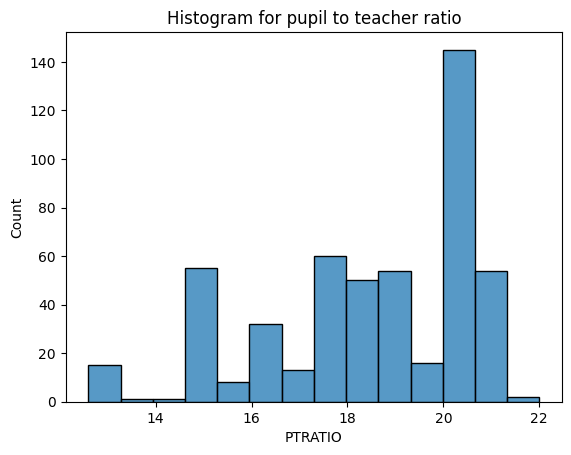

In [14]:
# Create a histogram for the pupil to teacher ratio variable
sns.histplot(boston_df['PTRATIO'])
plt.title('Histogram for pupil to teacher ratio')
plt.show()

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Hypothesis 

H0: the difference in median value of houses is not significant if bounded by the Charles river or not

H1 there is a significant difference

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True, alternative='two-sided')

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### The P value is smaller than 0.05 therefore we reject the null hypothesis H0
There is a signigficant difeence between median value of house if they are bounded to the Charles river or not

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Hypothesis 

H0: the difference in median value of houses is not significant for each proportion

H1 there is a significant difference

In [18]:
young = boston_df[boston_df["Age group"] == '35 years and younger']["MEDV"]
mid_life = boston_df[boston_df["Age group"] == 'between 35 and 70 years']["MEDV"]
old = boston_df[boston_df["Age group"] == '70 years and older']["MEDV"]

In [22]:
scipy.stats.f_oneway(young,mid_life,old,axis=0)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

#### The P value is smaller than 0.05 therefore we reject the null hypothesis H0


# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Hypothesis 

H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H1 there is a relationship

In [26]:
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### The P value is smaller than 0.05 therefore we reject the null hypothesis H0

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Hypothesis 

H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H1 there is a relationship

In [27]:
x = sm.add_constant(boston_df["DIS"], prepend=False)

In [29]:
model = sm.OLS(boston_df["MEDV"], x).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        21:27:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
const         18.3901      0.817     22.499      0.000      16.784      19.996
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""